### Machine Learning Final Project - HR Analytics Dataset
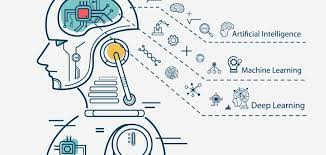

By Eliran Elias, Reef Navy, Rephal Zwecker & Ido David

Variable Definition 

- employee_id- Unique ID for employee
- department- Department of employee
- region- Region of employment (unordered)
- education- Education Level
- gender- Gender of Employee
- recruitment_channel- Channel of recruitment for employee
- no_of_trainings- number of other trainings completed in previous year on soft skills, technical skills etc.
- age- Age of Employee
- previous_year_rating- Employee Rating for the previous year
- length_of_service- Length of service in years
- KPIs_met >80% - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
- awards_won?- if awards won during previous year then 1 else 0
- avg_training_score- Average score in current training evaluations
- is_promoted- (Target) Recommended for promotion

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploratory Data Analysis

In [2]:
sns.set_style("darkgrid")
hr_data = pd.read_csv('promotions.csv')
hr_data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
hr_data.shape

(54808, 14)

We can see 54.8k instances and 14 features

In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


We can see that there's 5 categorial features to handle

In [5]:
hr_data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

We can see that there is no any extreme value in any feature (min or max)

We will drop employee_id column because of irrelevancy

In [6]:
hr_data.drop('employee_id',axis=1,inplace=True)

In [7]:
hr_data.isnull().sum()/len(hr_data)

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

We can see 0.44% missing values in education feature and 7.5% missing values in previous year rating feature

### Asking the relevant questions

What is the correlation of our features with the target column ?

<AxesSubplot:>

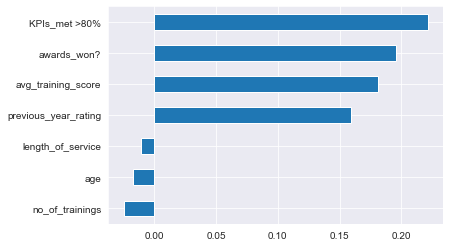

In [8]:
hr_data.corr()['is_promoted'][:-1].sort_values().plot(kind='barh')

What is the education distribution ?

<AxesSubplot:xlabel='education', ylabel='count'>

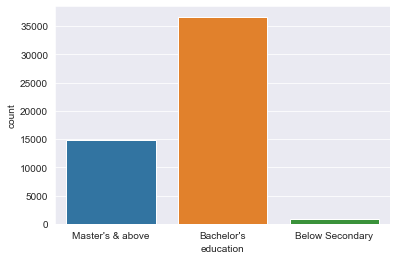

In [9]:
sns.countplot(x=hr_data.education,data=hr_data)

Is our data imbalanced? 

In [10]:
hr_data.is_promoted.value_counts(normalize=True)
# our dataset is imbalanced

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

What is the Department distribution ?

Text(0.5, 1.0, 'Department Frequency')

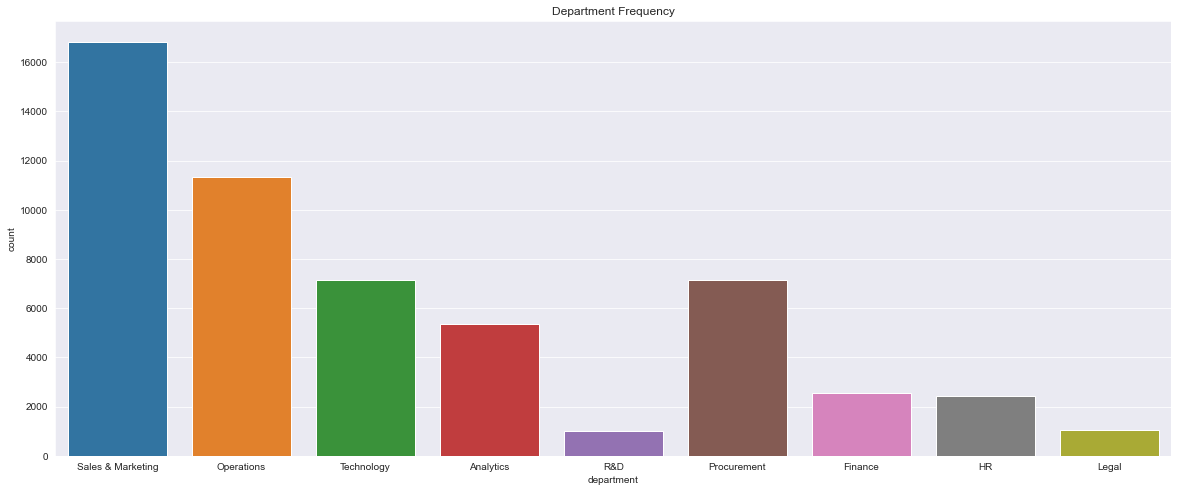

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x='department',data=hr_data)
plt.title('Department Frequency')

What is the employee distribution by promoted employees? in other words, what is the department that most likely promote employees

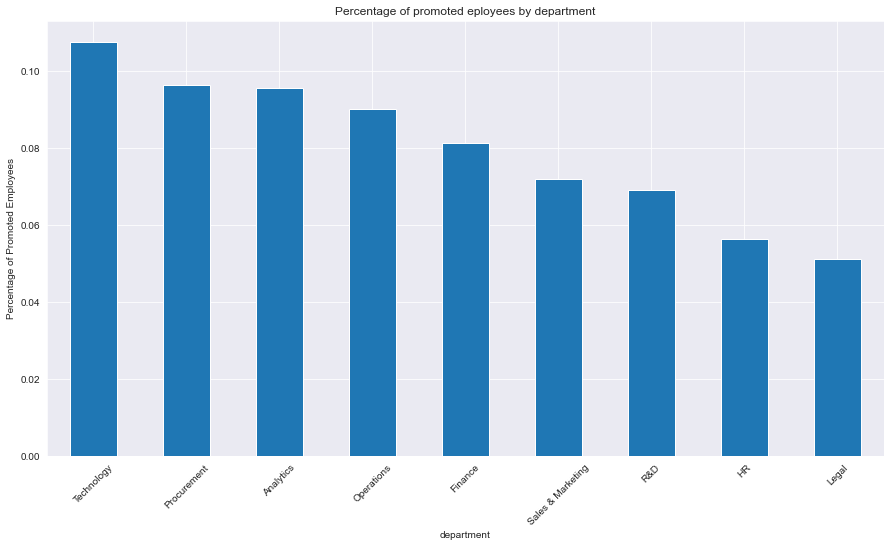

In [12]:
plt.figure(figsize=(15,8))
ax = hr_data.groupby('department')['is_promoted'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of promoted eployees by department')
# rotate the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('Percentage of Promoted Employees')
plt.show()

We can see that the Technology department is most likely too promote people

What is the most promoted region in our data?

In [13]:
hr_data.groupby('region')['is_promoted'].mean().sort_values(ascending=False)

region
region_4     0.144451
region_17    0.136935
region_25    0.125763
region_28    0.116844
region_23    0.116596
region_22    0.114188
region_3     0.106936
region_7     0.106546
region_1     0.095082
region_30    0.089802
region_13    0.086858
region_8     0.080916
region_2     0.080126
region_15    0.079060
region_27    0.078963
region_10    0.078704
region_14    0.074970
region_16    0.069625
region_12    0.066000
region_26    0.063274
region_19    0.060641
region_20    0.057647
region_31    0.056848
region_11    0.056274
region_6     0.046377
region_5     0.045692
region_21    0.043796
region_29    0.043260
region_32    0.042328
region_33    0.037175
region_24    0.035433
region_18    0.032258
region_34    0.027397
region_9     0.019048
Name: is_promoted, dtype: float64

It's seems that region 4 is the most promoted region

What is the recruitment distribution ? 

In [14]:
hr_data.recruitment_channel.value_counts(normalize=True)

other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64

What is the distribution of the number of trainings? 

In [15]:
hr_data.no_of_trainings.value_counts(normalize=True)

1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
8     0.000091
10    0.000091
9     0.000091
Name: no_of_trainings, dtype: float64

Text(0.5, 1.0, 'The average Training score for number of trainings by promoted employees')

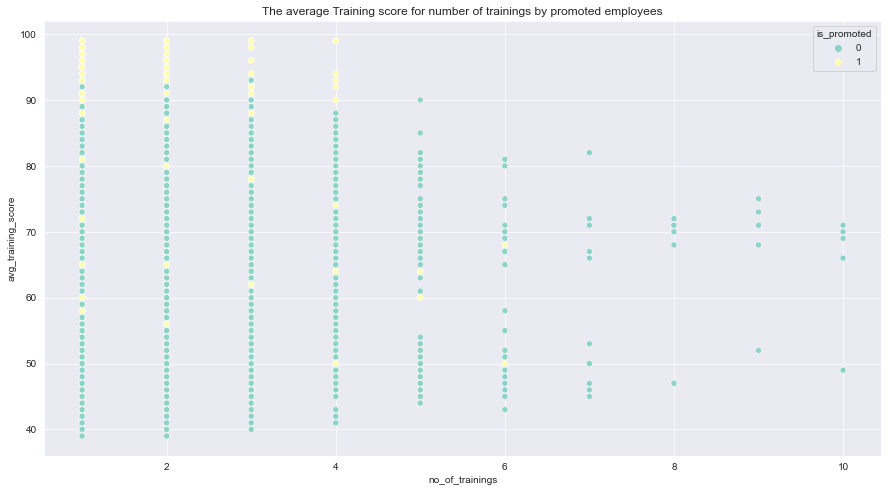

In [16]:
# Lets check out the number of trainings with the average training score 
plt.figure(figsize=(15,8))
sns.scatterplot(x='no_of_trainings',y='avg_training_score',data=hr_data,hue='is_promoted',palette='Set3')
plt.title('The average Training score for number of trainings by promoted employees')

We can see that when the more the training score is higher - it means that the employee will get promotion. also, number of training has a negative correlation with promotion

In [17]:
# What is the influence of meeting the KPI on promotion ? 
hr_data.groupby('KPIs_met >80%')['is_promoted'].mean()

KPIs_met >80%
0    0.039587
1    0.169094
Name: is_promoted, dtype: float64

What is the influence of winning awards on promotion? 

In [18]:
hr_data.groupby('awards_won?')['is_promoted'].mean()
# From all of the people who won award - 44% were promoted

awards_won?
0    0.076749
1    0.440157
Name: is_promoted, dtype: float64

## Feature Engineering / Dealing with NA Values / Pre Processing
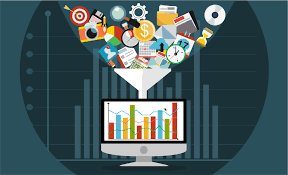

Lets first deal with our NA values 

We Want to fill the education with Missing

In [19]:
'''We will train a simple decision tree to decide which imputation is better by our f1 score prediction'''
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def encoder(df,lst):
    df = pd.get_dummies(columns=list(lst),data=df)
    return df

# Testing with fixed algorithm
df = hr_data.copy()
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Transforming category features

# Filling fixed value
df.previous_year_rating.fillna(df.previous_year_rating.mean(),inplace=True)

df.education.fillna("Missing")
df = encoder(df,df.select_dtypes('object'))
df.drop(list(df.select_dtypes('object')),axis=1)
X = df.drop('is_promoted',axis=1)
y = df.is_promoted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(f1_score(y_test,y_pred))

0.293108001056245


What will happen if we will drop the missing values ? 

In [20]:
# Check if dropping the na values for the column will influence
df = hr_data.copy()

# Filling fixed value with mean value
df.previous_year_rating.fillna(df.previous_year_rating.mean(),inplace=True)

# Transforming category features

df = df[df['education'].notna()]
df = encoder(df,df.select_dtypes('object'))
df.drop(list(df.select_dtypes('object')),axis=1)
X1 = df.drop('is_promoted',axis=1)
y1 = df.is_promoted
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(f1_score(y_test,y_pred))

0.3154625253207292


We want to fill the missing values in previous year rating,
What will happen if we will use knn_imputer to fill previous year rating?

In [21]:
# Check if dropping the na values for the column will influence
from sklearn.impute import KNNImputer
df = hr_data.copy()

# Filling fixed value
df = df[df['education'].notna()]

# Encoding
df = encoder(df,df.select_dtypes('object'))
df.drop(list(df.select_dtypes('object')),axis=1)

# Imputing with KNN
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')
imputer.fit(df)
X_trans = imputer.transform(df)
df = pd.DataFrame(X_trans,columns=df.columns)
# Check f1 score
X1 = df.drop('is_promoted',axis=1)
y1 = df.is_promoted
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(f1_score(y_test,y_pred))

0.31527890056588526


It seems that there is no difference between knn imputer and mean filling of previous year rating

In [22]:
# We decided to drop the educational missing values instances and fill previous_year with mean value
hr_data = hr_data[hr_data['education'].notna()]
hr_data.previous_year_rating.fillna(hr_data.previous_year_rating.mean(),inplace=True)

In [23]:
# As we saw before, there is a difference between regions in promotions
# Lets define classes of region importancy
lst = hr_data.groupby('region')['is_promoted'].mean()
def fill_region_level(val):
    if lst[val] <= 0.06:
        return 'Low_Promoting_Region'
    elif lst[val] <= 0.1:
        return 'Medium_Promoting_Region'
    else:
        return 'High_Promoting_Region'
hr_data.region = hr_data.region.apply(lambda val: fill_region_level(val))
hr_data.region.value_counts()

Medium_Promoting_Region    26543
High_Promoting_Region      16730
Low_Promoting_Region        9126
Name: region, dtype: int64

In [24]:
hr_data = pd.get_dummies(hr_data,columns=list(hr_data.select_dtypes('object')))

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling

In [25]:
# Import Smote for upgrading the minority class and undersampler for lowering the majority class
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.3, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean f1-score: %.3f' % (k, score))


> k=1, Mean f1-score: 0.404
> k=2, Mean f1-score: 0.405
> k=3, Mean f1-score: 0.403
> k=4, Mean f1-score: 0.402
> k=5, Mean f1-score: 0.401
> k=6, Mean f1-score: 0.401
> k=7, Mean f1-score: 0.396


Handling imbalanced Data With Smote and Undersampling
We will use smote to making the minority class stronger to 30% proportion, and in the meantime to undersample the majority vote to make the balance between the classes more stable.

In [26]:
# fit and apply the pipeline
over = SMOTE(sampling_strategy=0.3, k_neighbors=1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

X = hr_data.drop('is_promoted',axis=1)
y = hr_data.is_promoted

X_resampled, y_resampled = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

## Algorithm Performance

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import recall_score,accuracy_score,classification_report,confusion_matrix,f1_score

# Lets create a benchmark model 


### Benchmark Model

In [28]:
# Building a benchmark calssification model - that will predict the proportion of the leading class
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(x.shape[0])*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(X_train, benchmark_value)
y_test_pred = get_benchmark_predictions(X_test, benchmark_value)

train_f1 = classification_report(y_train,y_train_pred,zero_division=0,output_dict=True)
test_f1 = classification_report(y_test, y_test_pred,zero_division=0,output_dict=True)

train_f1['macro avg']['f1-score'], test_f1['macro avg']['f1-score']

(0.39993231945218566, 0.4001578531965272)

It seems that our benchmark model got great results due to imbalanced dataset

### ML Algorithms

What is the algorithm performance of knn classifier ? 

In [29]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
values = [4,20,50]
for i in values:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f'The score for knn with {i} neighbor is:', f1_score(y_test,y_pred))
    if i == 20:
        knn_score =  f1_score(y_test,y_pred)

The score for knn with 4 neighbor is: 0.8548123980424144
The score for knn with 20 neighbor is: 0.8032862763249248
The score for knn with 50 neighbor is: 0.7831385227555334


Basically we can see huge performance of our f1 score due to taking care of our imbalancing problem

What is the algorithm performance of knn classifier with standard scaled values ? 

In [30]:
# standard scaled KNN Algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in values:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f'The score for knn with {i} neighbor is:', f1_score(y_test,y_pred))
    if i == 20:
        knn_normal_scaled_score =  f1_score(y_test,y_pred)

The score for knn with 4 neighbor is: 0.8278580814717478
The score for knn with 20 neighbor is: 0.8212441603147284
The score for knn with 50 neighbor is: 0.8099236641221375


We can see that unscaled knn is performing better

What is the algorithm perforamance of minmax scaled values ? 

In [31]:
import warnings
warnings
# minmax scaled KNN Algorithm
from sklearn.preprocessing import MinMaxScaler

# train test method after scaling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)


scaler = MinMaxScaler()
# Scaling columns

cols_to_scale = list(np.where(X_train.max() > 1))
col_names = list(X_train.columns[cols_to_scale])
train_features = X_train[col_names]

# Scaling X_train
train_features = scaler.fit_transform(train_features)
X_train[col_names] = train_features

# Scaling X_test
test_features = X_test[col_names]
test_features = scaler.transform(test_features)
X_test[col_names] = test_features

for i in values:
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f'The score for knn with {i} neighbor is:', f1_score(y_test,y_pred))
    if i == 20:
        knn_minmax_scaled_score =  f1_score(y_test,y_pred)

The score for knn with 4 neighbor is: 0.8295697646779177
The score for knn with 20 neighbor is: 0.8182944967773922
The score for knn with 50 neighbor is: 0.8058710912571794


It seems that the knn minmax scaled is improving our results

Decision tree model evaluation

In [32]:
# Decision Tree with weighting imbalanced data method

# train test method to undo scaling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier

# Picking 3 depths 
for i in list(np.linspace(4,30,3,dtype='int')):
    tree = DecisionTreeClassifier(max_depth=i,class_weight = 'balanced')
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    print(f'The score for The Decision tree with max depth of {i} is:', f1_score(y_test,y_pred))
    if i == 30:
        decision_tree_f1score = f1_score(y_test,y_pred)

The score for The Decision tree with max depth of 4 is: 0.6663455981506454
The score for The Decision tree with max depth of 17 is: 0.8042384673017232
The score for The Decision tree with max depth of 30 is: 0.8261814852958004


In [33]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

In [34]:
# The Trees we got are : 
dot_data = StringIO()
export_graphviz(tree, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=False,
                feature_names = list(X.columns),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.1346 to fit



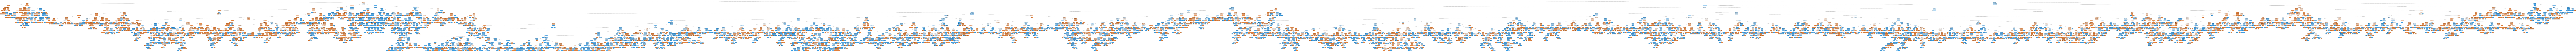

In [35]:
Image(graph.create_png())

Random Forest Classifier Model Evalutaion

In [36]:
from sklearn.ensemble import RandomForestClassifier
for i in list(np.linspace(3,40,3,dtype='int')):
    rfc = RandomForestClassifier(max_depth=i,n_estimators=100,class_weight = 'balanced_subsample')
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    if i == 21:
        rfc_pred = f1_score(y_test,y_pred)
    print(f'The score for The Random Forest with 100 estimators and max depth of {i} is:', f1_score(y_test,y_pred))

The score for The Random Forest with 100 estimators and max depth of 3 is: 0.6677669902912622
The score for The Random Forest with 100 estimators and max depth of 21 is: 0.8598524762908324
The score for The Random Forest with 100 estimators and max depth of 40 is: 0.8665367754505602


We can see random forest with max_depth of 40 does a great job

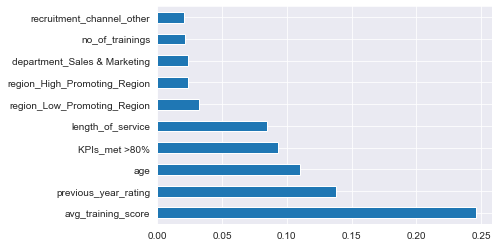

In [37]:
# The random forest feature importances
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()    

In [38]:
from sklearn.ensemble import AdaBoostClassifier
for i in list(np.linspace(4,40,3,dtype='int')):
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i,class_weight='balanced'),n_estimators=100)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    print(f'The score for The AdaBoost with 100 estimators and max depth of {i} is:', f1_score(y_test,y_pred))
    if i == 40:
        ada_f1 = f1_score(y_test,y_pred)


The score for The AdaBoost with 100 estimators and max depth of 4 is: 0.8319981947421866
The score for The AdaBoost with 100 estimators and max depth of 22 is: 0.868596342497275
The score for The AdaBoost with 100 estimators and max depth of 40 is: 0.8718381112984823


The Best Algorithm is AdaBoost

## Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Lets first begin with training the best base estimator to our model 
tree = DecisionTreeClassifier(max_depth=40)

In [40]:
# Building Tuned Model
# Picking a different test size after evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# Building Adaboost Classifier with tuned tree
ada_parameters = {
    'n_estimators' : [25,50,100,120,150],
    'learning_rate' :list(np.linspace(0.01,1,10)),
    }
ada = AdaBoostClassifier(base_estimator = tree)
# Tuning the adaboost
grid_search_ABC = GridSearchCV(ada, param_grid=ada_parameters,cv=5,scoring='f1',n_jobs=-1)
grid_search_ABC.fit(X_train,y_train)
# Applying tuned adaboost
ada = grid_search_ABC.best_estimator_
ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=40),
                   learning_rate=0.23, n_estimators=150)

In [41]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(f'The score for The tuned AdaBoost', f1_score(y_test,y_pred))
ada_tuned = f1_score(y_test,y_pred)

The score for The tuned AdaBoost 0.8792117747232697


So we can see an improvement of our f1-score 

In [42]:
# To conclude the algorithms performances are
names = ['knn','knn_normal_scaling','knn_minmax_scaling','Decision_Tree','RandomForest','AdaBoost','Tuned_AdaBoost']
vals = [knn_score,knn_normal_scaled_score,knn_minmax_scaled_score,decision_tree_f1score,rfc_pred,ada_f1,ada_tuned]
pd.Series(data=vals,index=names,name='F1 Scores').to_frame()

F1 Scores
knn                  0.803286
knn_normal_scaling   0.821244
knn_minmax_scaling   0.818294
Decision_Tree        0.826181
RandomForest         0.859852
AdaBoost             0.871838
Tuned_AdaBoost       0.879212

In [43]:
pd.Series(data=test_f1['macro avg']['f1-score'],index=['Benchmark'],name='Benchmark Model').to_frame()

Benchmark Model
Benchmark         0.400158

We can see that most of our algorithms passes the benchmark model (40% f1score)
It can be seen that we suceeded with the imbalanced data handling

### Additional Analysis - Performance vs Amount of data

In [44]:
new_lst = [0.9,0.7,0.5,0.3,0.001]
test = []
for i in new_lst:
    # Splitting data again
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=i, random_state=0)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    test.append(f1_score(y_test,y_pred,zero_division=0))

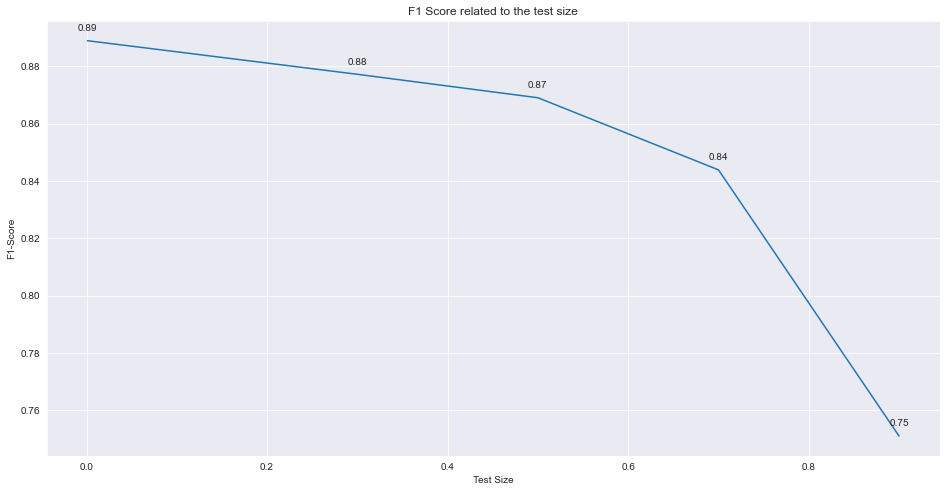

In [45]:
# Plotting the result
plt.figure(figsize=(16,8))
sns.lineplot(x=new_lst,y=test)
plt.title('F1 Score related to the test size')
plt.ylabel('F1-Score')
plt.xlabel('Test Size')

# Set Values of f1 score
for x,y in zip(new_lst,test):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

We can see that our dataset is acting kind of normal vs the test size,
the more the test size is bigger, we train less data on train set and therefore our prediction results will be lower.
We belive that with more feature engeneering, feature selection and hyperparameter tuning we can reach higher results. 
but, with f1 score of approximately 87% our model can assure certain truth and maybe deployed into some kind of production.
in data science there is always something new to discover about our data.

Thank you for reading, 
Refael, Eliran, Reef & Ido.